In [11]:
import os
from glob import glob
import subprocess
import shutil
import traceback
import random
import pickle

import joblib
from concurrent.futures import ProcessPoolExecutor

from backports import tempfile

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 144
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
plt.viridis()

import psrchive

import pipe

In [2]:
test_file = "/psr_archive/hessels/archibald/0337+17/raw/GBT/guppi_56047_0337+17_0002.fits"
test_output_dir = "/tmp/wsrt_problem"
test_output = os.path.join(test_output_dir, os.path.basename(test_file))

In [3]:
F = psrchive.Archive_load(test_file)
pipe.check_call(["paz", "-O", test_output_dir,
                 "-r", "-R", "20",
                 test_file])
G = psrchive.Archive_load(test_output)
G.pscrunch()


In [17]:
A = G.get_data()
S = np.std(A,axis=-1)[:,0,:]
cf = G.get_centre_frequency()
bw = G.get_bandwidth()
tf = cf+bw/2
bf = cf-bw/2
W = G.get_weights()

print S.mean(), S.std(), S.max()

4.34358 2.86667 323.447


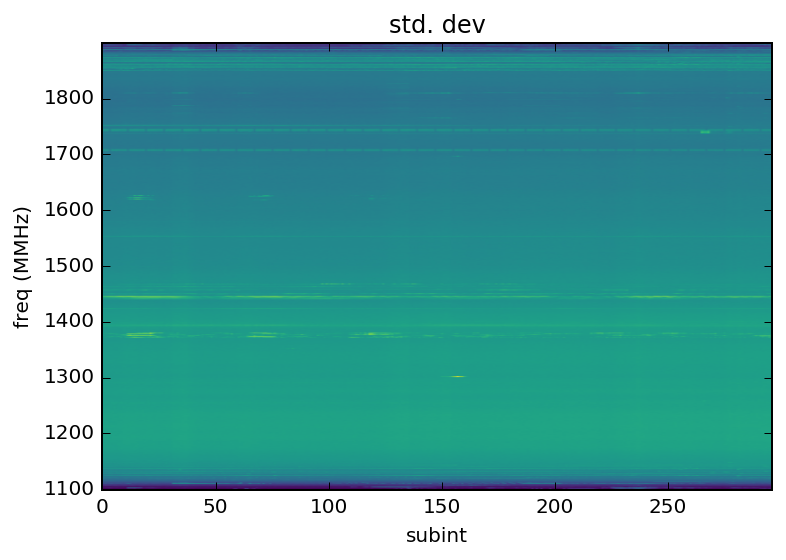

In [18]:
plt.imshow(np.log(S.T), extent=(0,len(G)-1,bf,tf))

plt.gca().set_aspect('auto')
plt.xlabel("subint")
plt.ylabel("freq (MMHz)")
plt.title("std. dev")

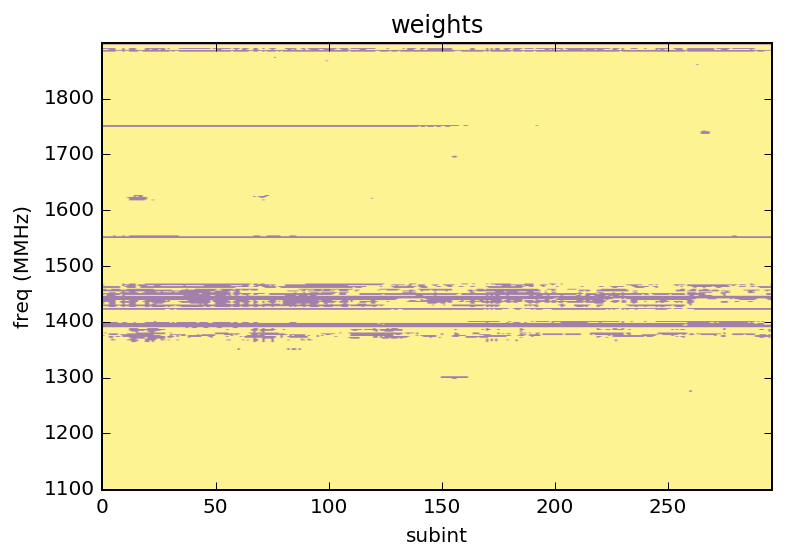

In [19]:
plt.imshow(W.T, extent=(0,len(G)-1,bf,tf), alpha=0.5)
plt.gca().set_aspect('auto')
plt.xlabel("subint")
plt.ylabel("freq (MMHz)")
plt.title("weights")

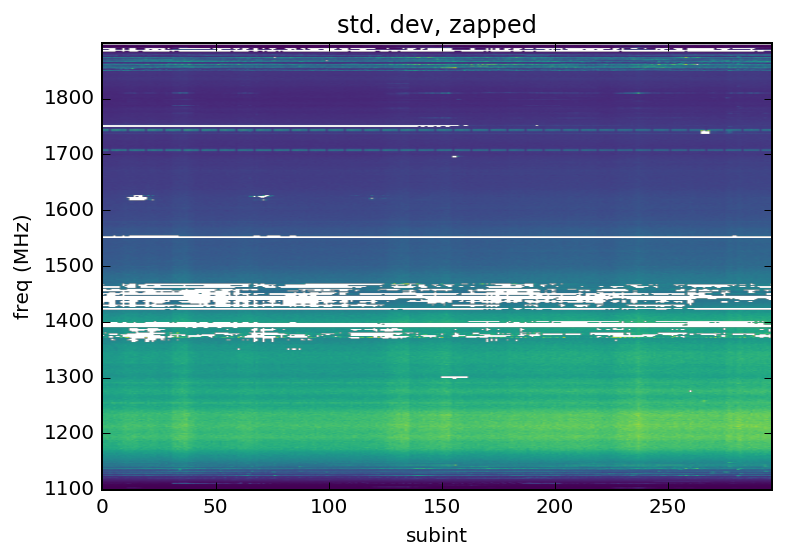

In [24]:
Sm = ma.array(S)
Sm[W==0] = ma.masked

#plt.imshow(np.log(Sm.T), extent=(0,len(G)-1,bf,tf))
plt.imshow(Sm.T, extent=(0,len(G)-1,bf,tf))

plt.gca().set_aspect('auto')
plt.xlabel("subint")
plt.ylabel("freq (MHz)")
plt.title("std. dev, zapped")

In [21]:
matplotlib.__version__

'1.5.3'

In [25]:

I = G.get_Integration(0)

In [26]:
I.set_weight()

TypeError: Integration_set_weight() takes exactly 3 arguments (1 given)

In [28]:
I.get_weight(17)

16.014842987060547

(array([  10557.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  141507.]),
 array([  0.        ,   1.6014843 ,   3.2029686 ,   4.8044529 ,
          6.40593719,   8.00742149,   9.60890579,  11.21039009,
         12.81187439,  14.41335869,  16.01484299]),
 <a list of 10 Patch objects>)

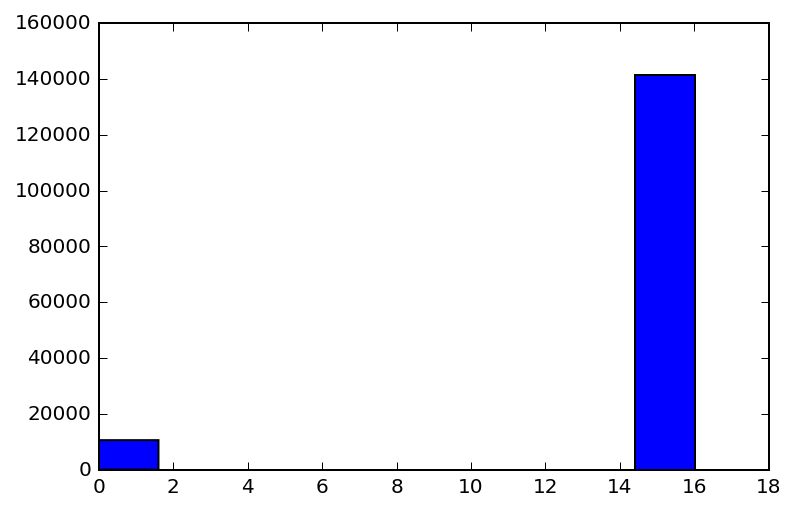

In [31]:
plt.hist(np.reshape(W,(-1,)))